In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Make matplotlib figures appear inline in the
# notebook rather than in a new window
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

def display(img, title=None):
    # Show image
    plt.figure(figsize = (15,15))
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')
    plt.show()

In [2]:
from skimage import io
def load(image_path):
    """Loads an image from a file path, returning a numpy array of shape(image_height, image_width, 3).
    """
    out = io.imread(image_path)
    return out

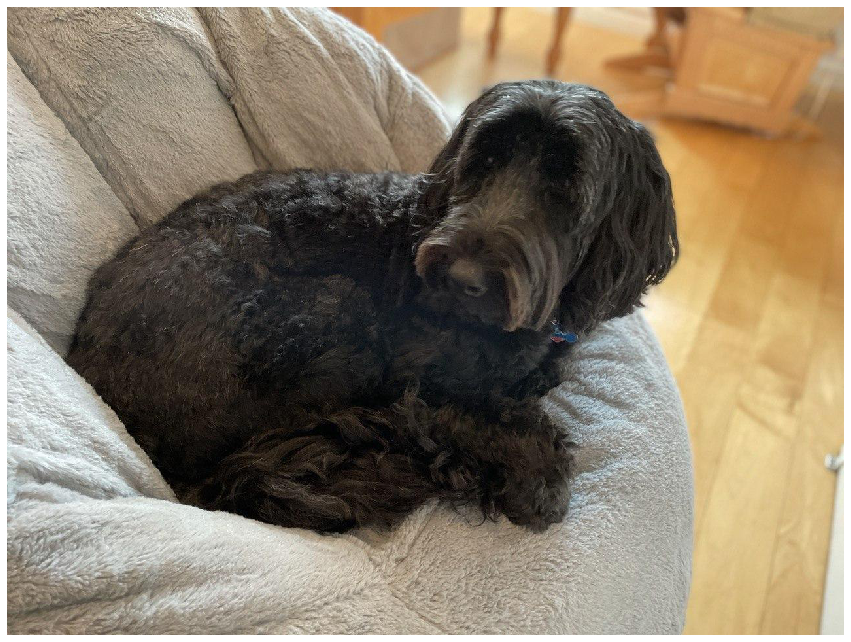

In [4]:
image1 = load('./CornerImages/photo_2021-11-05_11-06-40.jpg')
display(image1)

I used the filter framework from the filters assignment. Then I made gaussian kernels of different sizes, and subtracted the results of the larger from the smaller.

In [43]:
def fast_convolution_filter(image, kernel):
    """
    Args:
        image: numpy array of shape (Hi, Wi).
        kernel: numpy array of shape (Hk, Wk).
    Returns:
        out: numpy array of shape (Hi, Wi).
    """
    out = np.zeros(image.shape)
    half_kernel = kernel.shape[0]//2
    image_pad = np.pad(image, ((half_kernel,half_kernel),(half_kernel,half_kernel)), mode='constant')
    expanded_kernel = kernel
    
    for image_row in range(image.shape[0]):
        for image_column in range(image.shape[1]):
            # Hadamard product
            output_value = expanded_kernel*image_pad[image_row:image_row+1+(2*half_kernel), image_column:image_column+1+(2*half_kernel)]
            out[image_row, image_column] = np.sum(np.sum(output_value, axis=0), axis=0)
            
    return out

In [44]:
# For an arbitrary size Gaussian blur kernel
# https://stackoverflow.com/questions/29731726/how-to-calculate-a-gaussian-kernel-matrix-efficiently-in-numpy
def gkern(l=5, sig=1.):
    """\
    creates gaussian kernel with side length l and a sigma of sig
    """

    ax = np.linspace(-(l - 1) / 2., (l - 1) / 2., l)
    xx, yy = np.meshgrid(ax, ax)

    kernel = np.exp(-0.5 * (np.square(xx) + np.square(yy)) / np.square(sig))

    return kernel / np.sum(kernel)

In [49]:
filter_3 = np.array(
[
    [1/16,2/16,1/16],
    [2/16,4/16,2/16],
    [1/16,2/16,1/16]
])
filter_5 = np.array(
[
    [1/256,4/256,6/256,4/256,1/256],
    [4/256,16/256,24/256,16/256,4/256],
    [6/256,24/256,36/256,24/256,6/256],
    [4/256,16/256,24/256,16/256,4/256],
    [1/256,4/256,6/256,4/256,1/256]
])
filter_11 = gkern(l=11)
filter_21 = gkern(l=21)

In [50]:
from skimage import color

In [51]:
def diff_of_gauss(img, bias=0.5):
    img_gray = color.rgb2gray(img)
    return bias + fast_convolution_filter(img_gray, filter_11) - fast_convolution_filter(img_gray, filter_21)

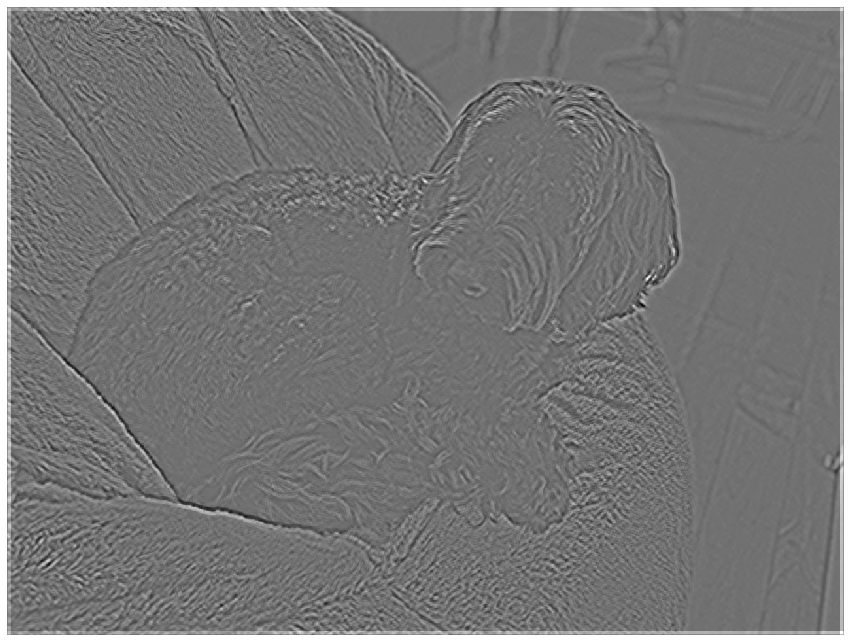

In [52]:
display(diff_of_gauss(image1))

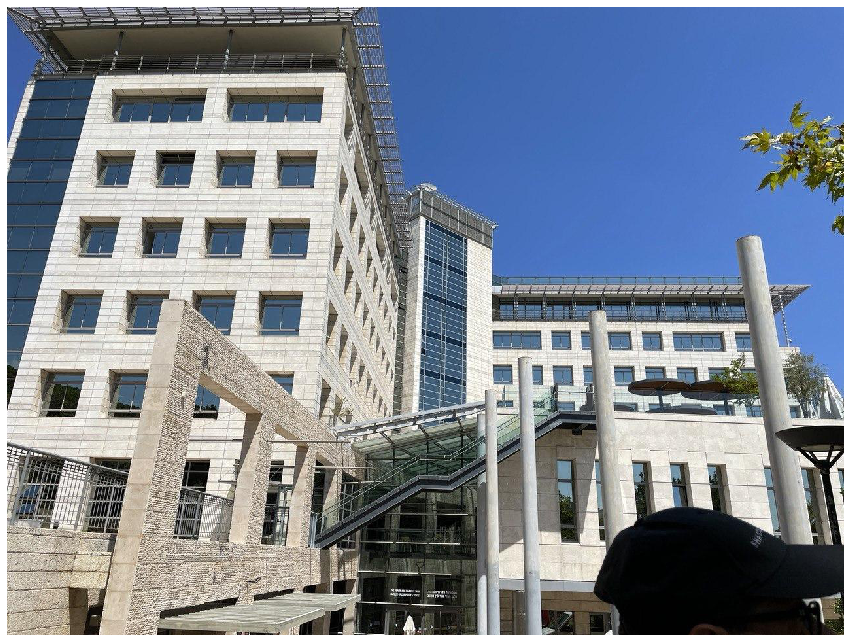

In [53]:
image2 = load('./CornerImages/photo_2021-11-05_11-06-25.jpg')
display(image2)

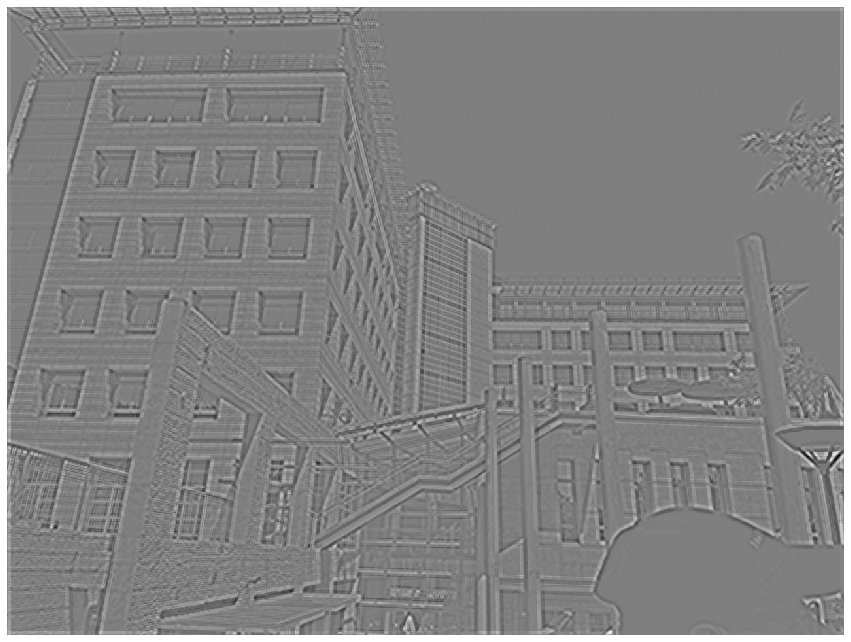

In [54]:
display(diff_of_gauss(image2))

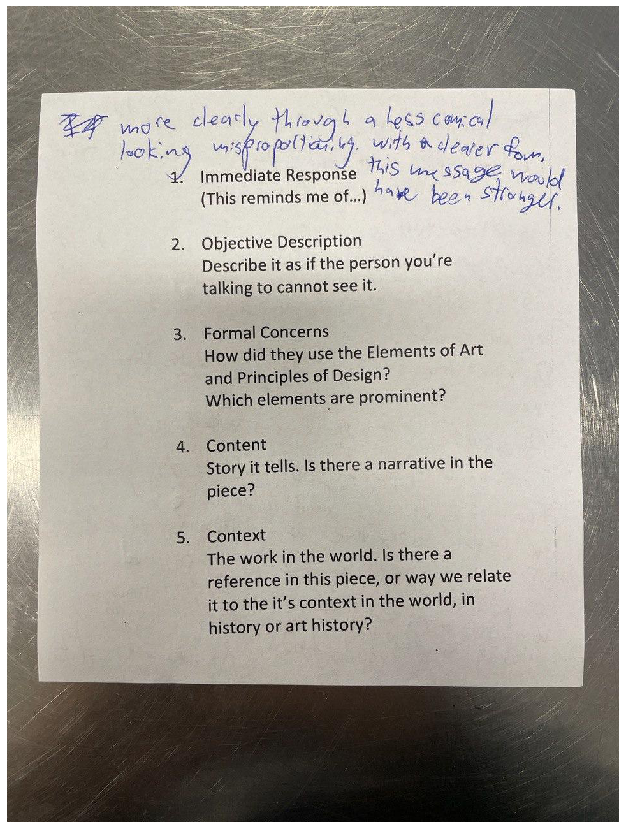

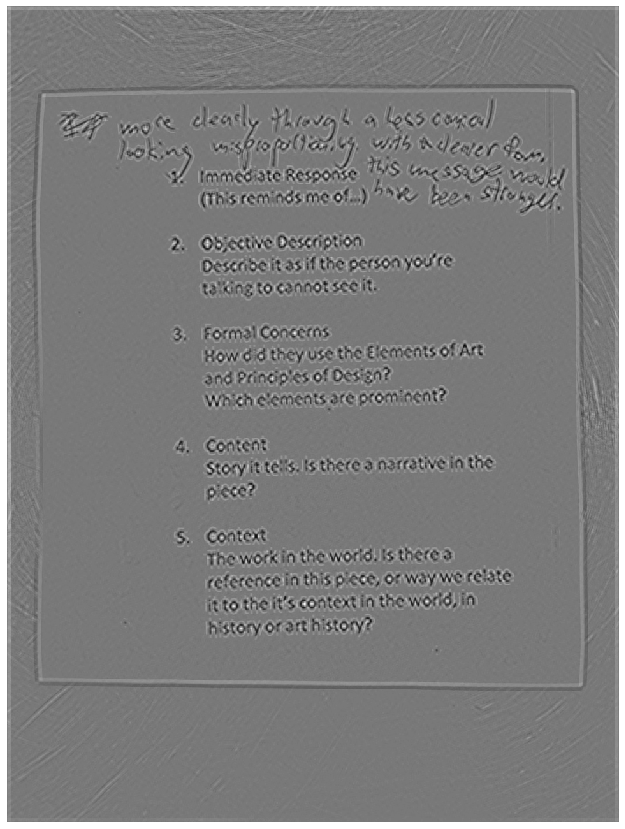

In [55]:
image3 = load('./CornerImages/photo_2021-11-05_11-06-41.jpg')
display(image3)
display(diff_of_gauss(image3))

The [Difference of Gaussians](https://en.wikipedia.org/wiki/Difference_of_Gaussians) algorithm is used to accentuate edges and medium sized features in the image. It acts like a spatial band pass filter because it filters out high frequency information smaller than the kernels like random noise, but also features which are much larger than the kernels. The image of the building is a great example of this algorithm in use because it does a great job of eliminating the small bumps in the stone and just showing the edges. On the other extreme, it eliminates the smooth color gradient in the sky and the color differences in the cladding. Difference in Gaussians is thought to be similar to the process that human brains use to distinguish edges.